# Preparation

**Dataset Description:**

The training dataset contains `2240 samples`. Contains `28 features` :

**Accepted/Responses Campaign**

- `AcceptedCmp1` - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2` - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3` - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4` - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5` - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response (target)` - 1 if customer accepted the offer in the last campaign, 0 otherwise
- `Complain` - 1 if customer complained in the previous 2 years

**Customer Information**

- `ID` - Customer's id
- `Year_Birth` - Customer's year of birth
- `Education` - customer’s level of education
- `Marital` - customer’s marital status
- `Kidhome` - number of small children in customer’s household
- `Teenhome` - number of teenagers in customer’s household
- `Income` - customer’s yearly household income
- `DtCustomer` - date of customer’s enrolment with the company
- `Recency` - number of days since the last purchase

**Sales Product Type**

- `MntFishProducts` - amount spent on fish products in the last 2 years
- `MntMeatProducts` - amount spent on meat products in the last 2 years
- `MntFruits` - amount spent on fruits products in the last 2 years
- `MntSweetProducts` - amount spent on sweet products in the last 2 years
- `MntWines` - amount spent on wine products in the last 2 years
- `MntGoldProds` - amount spent on gold products in the last 2 years

**Number of Purchases per Type**

- `NumDealsPurchases` - number of purchases made with discount
- `NumCatalogPurchases` - number of purchases made using catalogue
- `NumStorePurchases` - number of purchases made directly in stores
- `NumWebPurchases` - number of purchases made through company’s web site
- `NumWebVisitsMonth` - number of visits to company’s web site in the last month

**Cost and Revenue**

- `Z_CostContact = 3` (Cost to contact a customer)
- `Z_Revenue = 11` (Revenue after client accepting campaign)


### Modules Preparation

In [2]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")

In [4]:
url = 'https://drive.google.com/file/d/19TUlAkMBRQi4MKfimeYBxCrFSeYk0ZGr/view'
path = 'https://drive.google.com/u/0/uc?id=19TUlAkMBRQi4MKfimeYBxCrFSeYk0ZGr&export=download'+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Task 1

## Data Exploration

In [5]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (2240, 30)
Number of rows : 2240
Number of columns : 30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

**Observations:**

- The dataset has 2240 rows and 30 columns.
- 'Unnamed: 0' column is only an index that will be dropped.
- Contains 3 data types: float64, int64, object.
- Dt_Customer column has incorrect data type. Can be converted to datetime

## Feature Engineering

### Creating Age Group Column

In [7]:
# Convert Dt_Customer column data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

data_date = df['Dt_Customer'].max()
data_date.year

2014

Assumpting this dataset was **created in 2014** (latest costumer's enrollment with the company)

In [8]:
# from datetime import date as dt
# now_date = dt.today()
# current_year = now_date.year

#check current year
# current_year

In [9]:
df['Age'] = 2014 - df['Year_Birth']
df.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
1198,1198,5545,1972,S3,Menikah,78075000.0,0,0,2014-05-04,72,572000,8000,259000,34000,35000,80000,1,3,5,5,1,0,0,0,0,0,0,3,11,0,42
616,616,8953,1965,S2,Lajang,35791000.0,2,1,2013-06-05,94,27000,0,5000,0,0,3000,2,1,0,3,8,0,0,0,0,0,0,3,11,0,49
257,257,3406,1964,S1,Lajang,45989000.0,0,1,2012-10-22,97,138000,33000,87000,28000,24000,12000,4,3,2,7,3,0,0,0,0,0,0,3,11,0,50


According to [source](https://www.researchgate.net/figure/AGE-GROUP-NAME-WITH-ITS-AGE-RANGE_tbl1_271253673), customer ages are grouped into:

- Babies : 0 - 2 years
- Children : 3 - 16 years
- Young Adults : 17 - 30 years
- Middle-aged Adults : 31 - 45 years
- Old Adults : >45 years

In [10]:
def age_group(x):
    if x > 45:
        group = 'Senior Adult'
    elif x > 31:
        group = 'Middle-aged Adult'
    elif x > 17:
        group = 'Young Adult'
    elif x > 3:
        group = 'Children'
    else:
        group = 'Baby'
    
    return group

df['Age_group'] = df["Age"].apply(lambda x: age_group(x))

### Creating Total of Children Columns

In [11]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

### Creating New Marital Status Column

In [12]:
df['MaritalStatus'] = np.where(df['Marital_Status'].isin(['Menikah','Bertunangan']),
                               'InCouple', 'Alone')

### Creating Total Spend Column

In [13]:
df['Total_Spend'] = df['MntCoke'] + df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Creating Total Acceprted Campaign Column

In [14]:
df['TotalAccCmpg'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

### Creating Total Purchases Column

In [15]:
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumWebPurchases']

### Creating Customers Lifetime

In [16]:
df['Lifetime'] = (2014 - df["Dt_Customer"].dt.year)*12 + df["Dt_Customer"].dt.month

### Creating Conversion Rate Column

Conversion rate analysis purpose is to gathering insight from website visitors and their actions while visiting the website. 

In [17]:
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

In [18]:
df['Conversion_Rate'] = df.apply(lambda x : safe_div(x['TotalPurchases'], x['NumWebVisitsMonth']), axis = 1)

### Dropping Unnecessary Columns for EDA

In [19]:
df_eda = df.copy()

In [20]:
#num_cmp = [col for col in df.columns if 'Num' in col]
#mnt_cmp = [col for col in df.columns if 'Mnt' in col]
acc_cmp = [col for col in df_eda.columns if 'AcceptedCmp' in col]

#col_to_drop = num_cmp + mnt_cmp + acc_cmp
col_to_drop = acc_cmp

df_eda.drop(columns = col_to_drop, inplace=True)
df_eda.drop(columns = ['Unnamed: 0', 'Year_Birth', 'Kidhome', 'Teenhome'], inplace=True)

In [21]:
df_eda.sample(2)

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Total_Children,MaritalStatus,Total_Spend,TotalAccCmpg,TotalPurchases,Lifetime,Conversion_Rate
285,9974,S1,Menikah,30631000.0,2013-12-07,75,15000,6000,20000,4000,5000,20000,1,3,1,2,7,0,3,11,0,40,Middle-aged Adult,1,InCouple,70000,0,8,24,1.142857
1728,1000,S2,Bertunangan,74881000.0,2013-08-03,48,505000,72000,270000,36000,27000,54000,4,9,2,12,5,0,3,11,0,53,Senior Adult,2,InCouple,964000,0,24,20,4.800000


### Checking Dataset After Feature Engineering

In [22]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Dt_Customer          2240 non-null   datetime64[ns]
 5   Recency              2240 non-null   int64         
 6   MntCoke              2240 non-null   int64         
 7   MntFruits            2240 non-null   int64         
 8   MntMeatProducts      2240 non-null   int64         
 9   MntFishProducts      2240 non-null   int64         
 10  MntSweetProducts     2240 non-null   int64         
 11  MntGoldProds         2240 non-null   int64         
 12  NumDealsPurchases    2240 non-null   int64         
 13  NumWebPurchases      2240 non-nul

In [23]:
# Checking data
df_eda.sample(3)

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Total_Children,MaritalStatus,Total_Spend,TotalAccCmpg,TotalPurchases,Lifetime,Conversion_Rate
1199,7342,D3,Janda,59184000.0,2012-09-09,6,341000,142000,113000,259000,151000,66000,3,6,6,12,5,0,3,11,0,53,Senior Adult,1,Alone,1072000,0,21,33,4.200000
1356,7912,S1,Menikah,38136000.0,2013-04-22,69,8000,15000,27000,0,20000,33000,2,3,1,2,8,0,3,11,0,36,Middle-aged Adult,1,InCouple,103000,1,9,16,1.125000
1764,4328,D3,Menikah,21955000.0,2013-07-09,81,5000,1000,7000,17000,14000,11000,2,2,1,3,6,0,3,11,0,28,Young Adult,1,InCouple,55000,0,7,19,1.166667


## Exploratory Data Analysis (EDA)

In [24]:
# Checking Value from each feature
for col in df_eda.columns:
    print("{} have {} unique values: {}".format(col, df_eda[col].nunique(), df_eda[col].dtypes))
    if df_eda[col].dtypes == 'int64' or df_eda[col].dtypes == 'float64' or df_eda[col].dtypes == 'object':
        print("{} values: {}".format(col,df_eda[col].unique()))
        print('-' * 100)

ID have 2240 unique values: int64
ID values: [5524 2174 4141 ... 7270 8235 9405]
----------------------------------------------------------------------------------------------------
Education have 5 unique values: object
Education values: ['S1' 'S3' 'S2' 'SMA' 'D3']
----------------------------------------------------------------------------------------------------
Marital_Status have 6 unique values: object
Marital_Status values: ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']
----------------------------------------------------------------------------------------------------
Income have 1974 unique values: float64
Income values: [58138000. 46344000. 71613000. ... 56981000. 69245000. 52869000.]
----------------------------------------------------------------------------------------------------
Dt_Customer have 663 unique values: datetime64[ns]
Recency have 100 unique values: int64
Recency values: [58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96

## Univariate Analysis

In [25]:
nums = ['Income', 'Total_Children', 'Age', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spend', 'TotalAccCmpg', 
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
        'TotalPurchases', 'NumWebVisitsMonth', 'Conversion_Rate', 'Lifetime'
        ]

cats = ['Education', 'Complain', 'MaritalStatus','Response', 'Age_group'
        ]

In [26]:
df_eda[nums].describe().round(2)

,Income,Total_Children,Age,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spend,TotalAccCmpg,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalPurchases,NumWebVisitsMonth,Conversion_Rate,Lifetime
count,2.216000e+03,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5.224725e+07,0.95,45.19,49.11,303935.71,26302.23,166950.00,37525.45,27062.95,44021.88,605798.21,0.30,2.33,4.08,2.66,5.79,13.16,5.32,3.69,18.18
std,2.517308e+07,0.75,11.98,28.96,336597.39,39773.43,225715.37,54628.98,41280.50,52167.44,602249.29,0.68,1.93,2.78,2.92,3.25,7.77,2.43,4.12,10.05
min,1.730000e+06,0.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,3.530300e+07,0.00,37.00,24.00,23750.00,1000.00,16000.00,3000.00,1000.00,9000.00,68750.00,0.00,1.00,2.00,0.00,3.00,6.00,3.00,1.00,13.00
50%,5.138150e+07,1.00,44.00,49.00,173500.00,8000.00,67000.00,12000.00,8000.00,24000.00,396000.00,0.00,2.00,4.00,2.00,5.00,13.00,6.00,2.41,18.00
75%,6.852200e+07,1.00,55.00,74.00,504250.00,33000.00,232000.00,50000.00,33000.00,56000.00,1045500.00,0.00,3.00,6.00,4.00,8.00,18.00,7.00,4.81,24.00
max,6.666660e+08,3.00,121.00,99.00,1493000.00,199000.00,1725000.00,259000.00,263000.00,362000.00,2525000.00,4.00,15.00,27.00,28.00,13.00,54.00,20.00,54.00,36.00


In [27]:
df_eda[cats].describe().round(3)

,Complain,Response
count,2240.000,2240.000
mean,0.009,0.149
std,0.096,0.356
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,0.000,0.000
max,1.000,1.000


### Numerical Kernel Density Estimate (KDE) Plot Checking

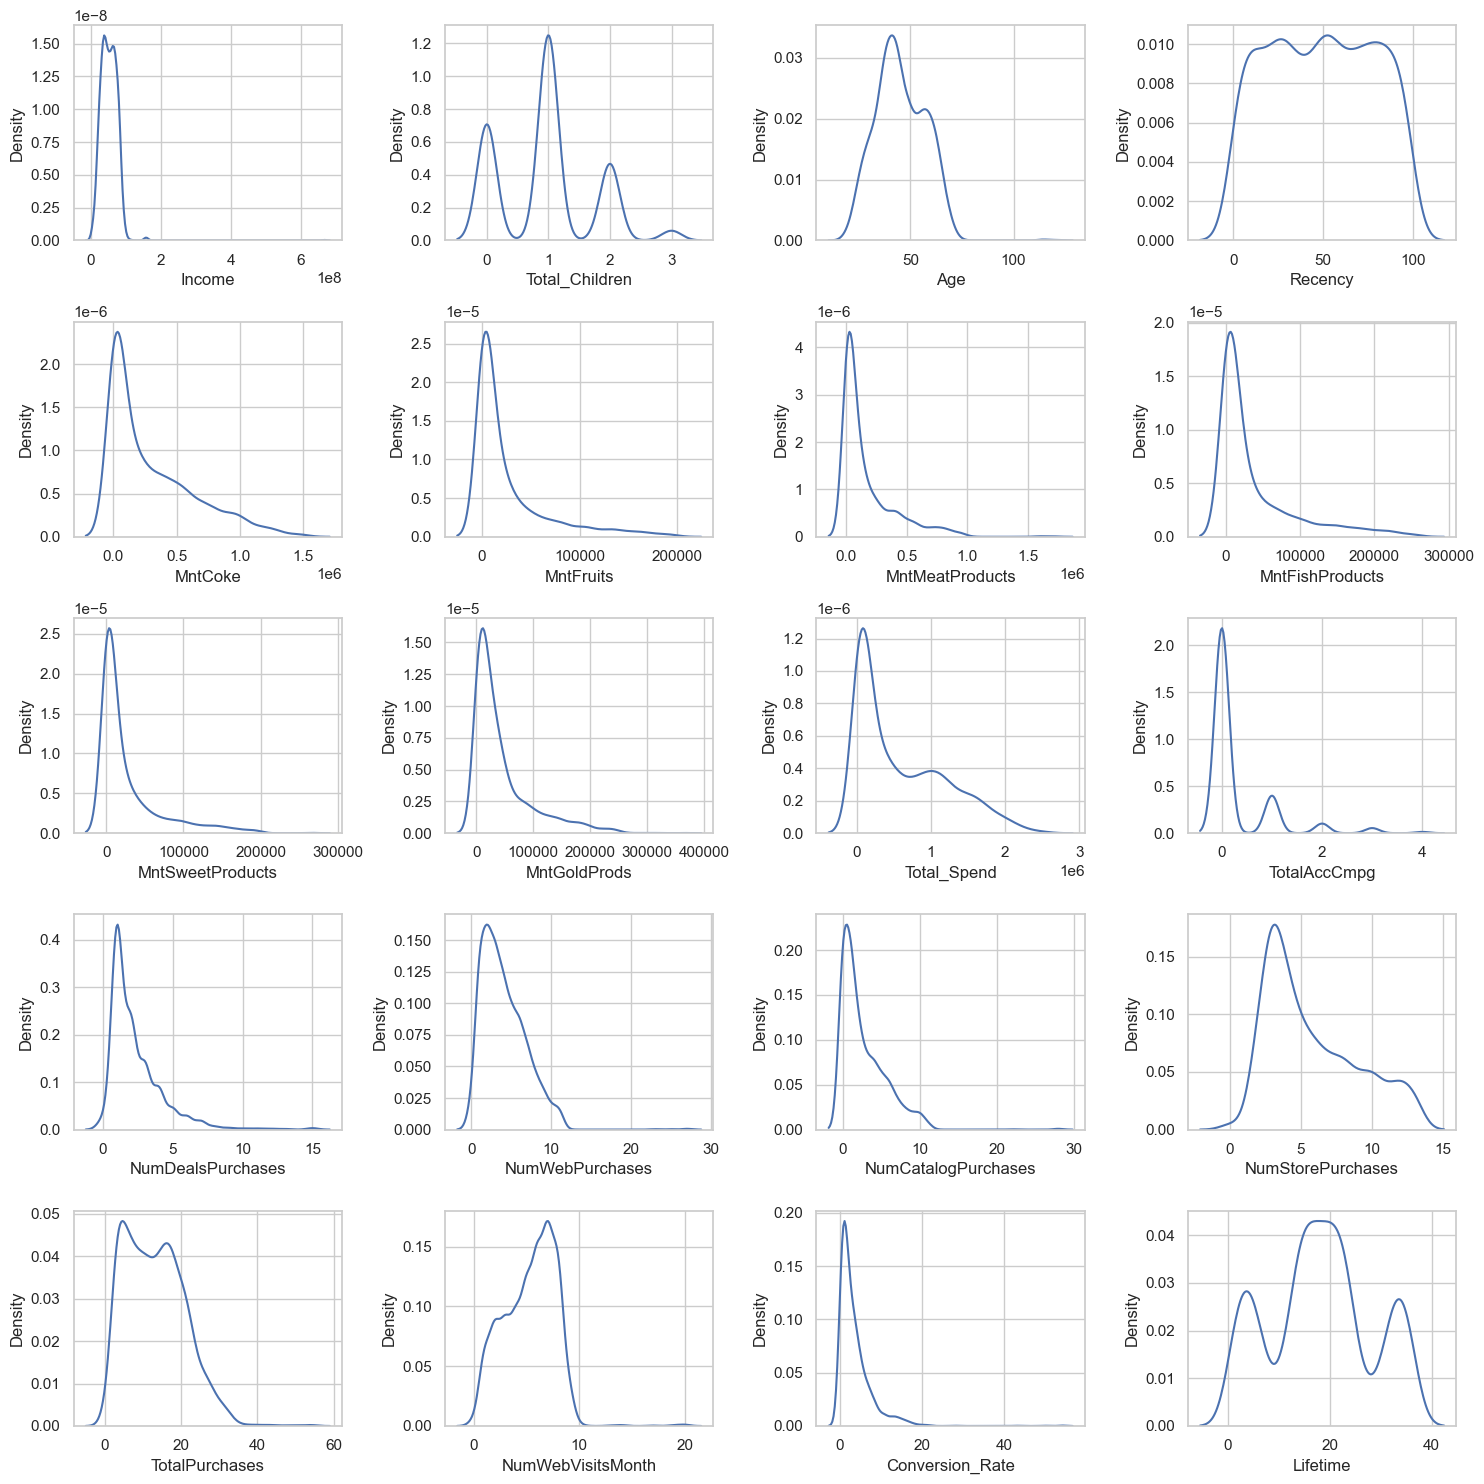

In [28]:
plt.figure(figsize= (15, 15))
for i in range(len(nums)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x = df_eda[nums[i]])
    plt.tight_layout()

### Numerical Box Plot Checking

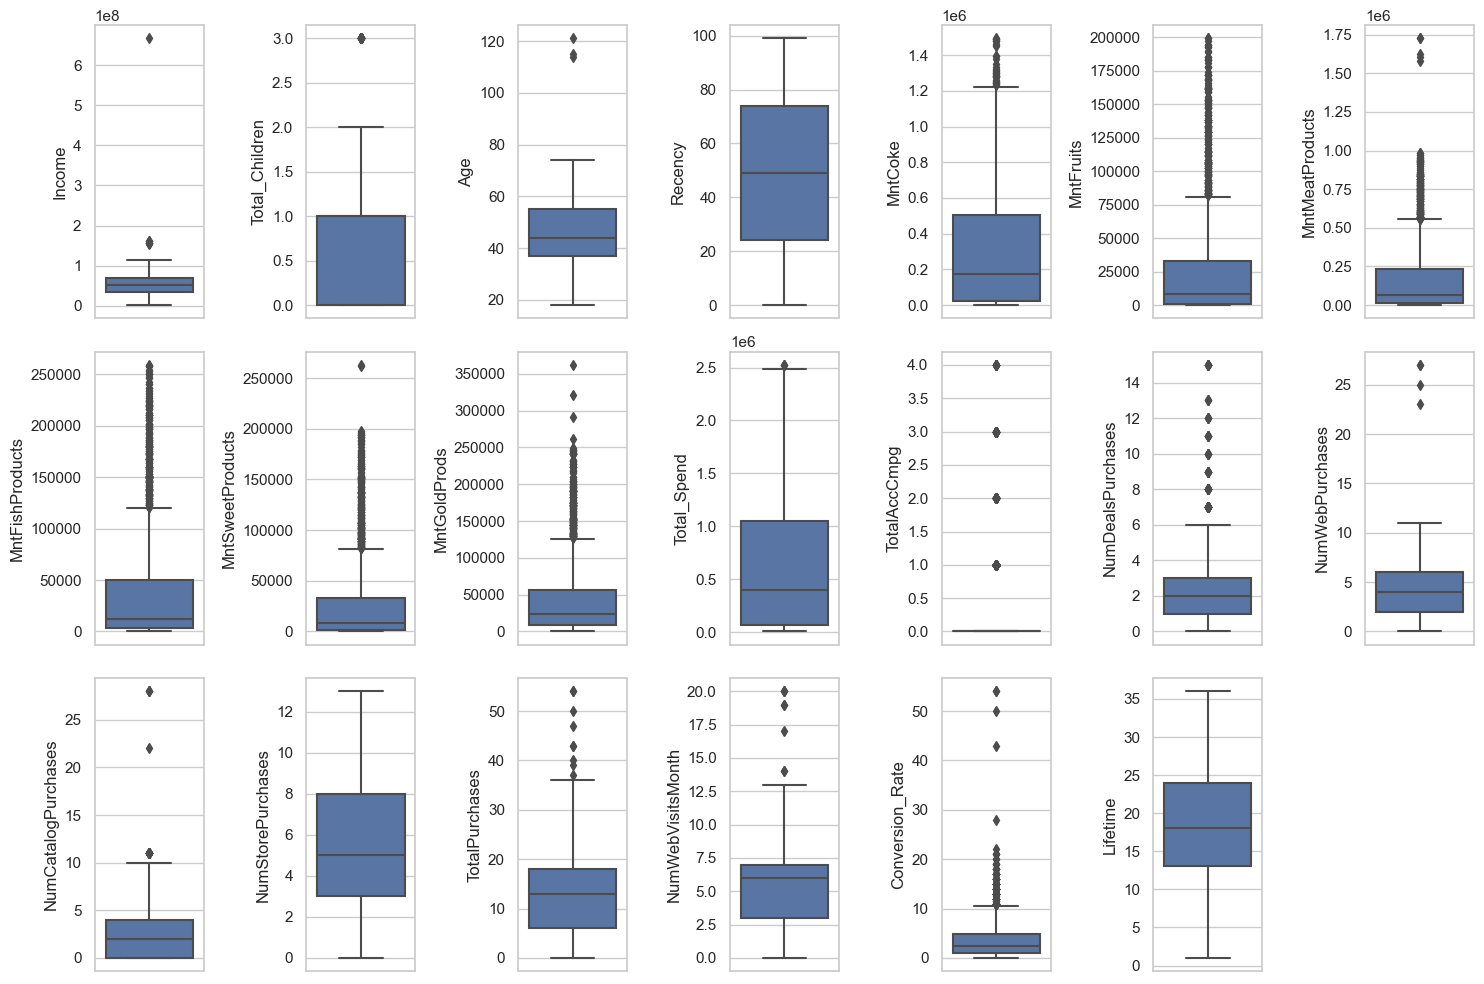

In [29]:
plt.figure(figsize= (15,10))
for i in range(len(nums)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y = df_eda[nums[i]], orient='v')
    plt.tight_layout()

**Observation:**

- All numerical columns above except `Recency` has positive outliers.
- All numerical columns above that have outliers and NumStorePurchases are right skewed.
- `Recency` and `Lifetime` columns have normal distribution (symmetric).
- `Income` and `Age` columns have the most significant outliers.

### Categorical Count Plot Checking

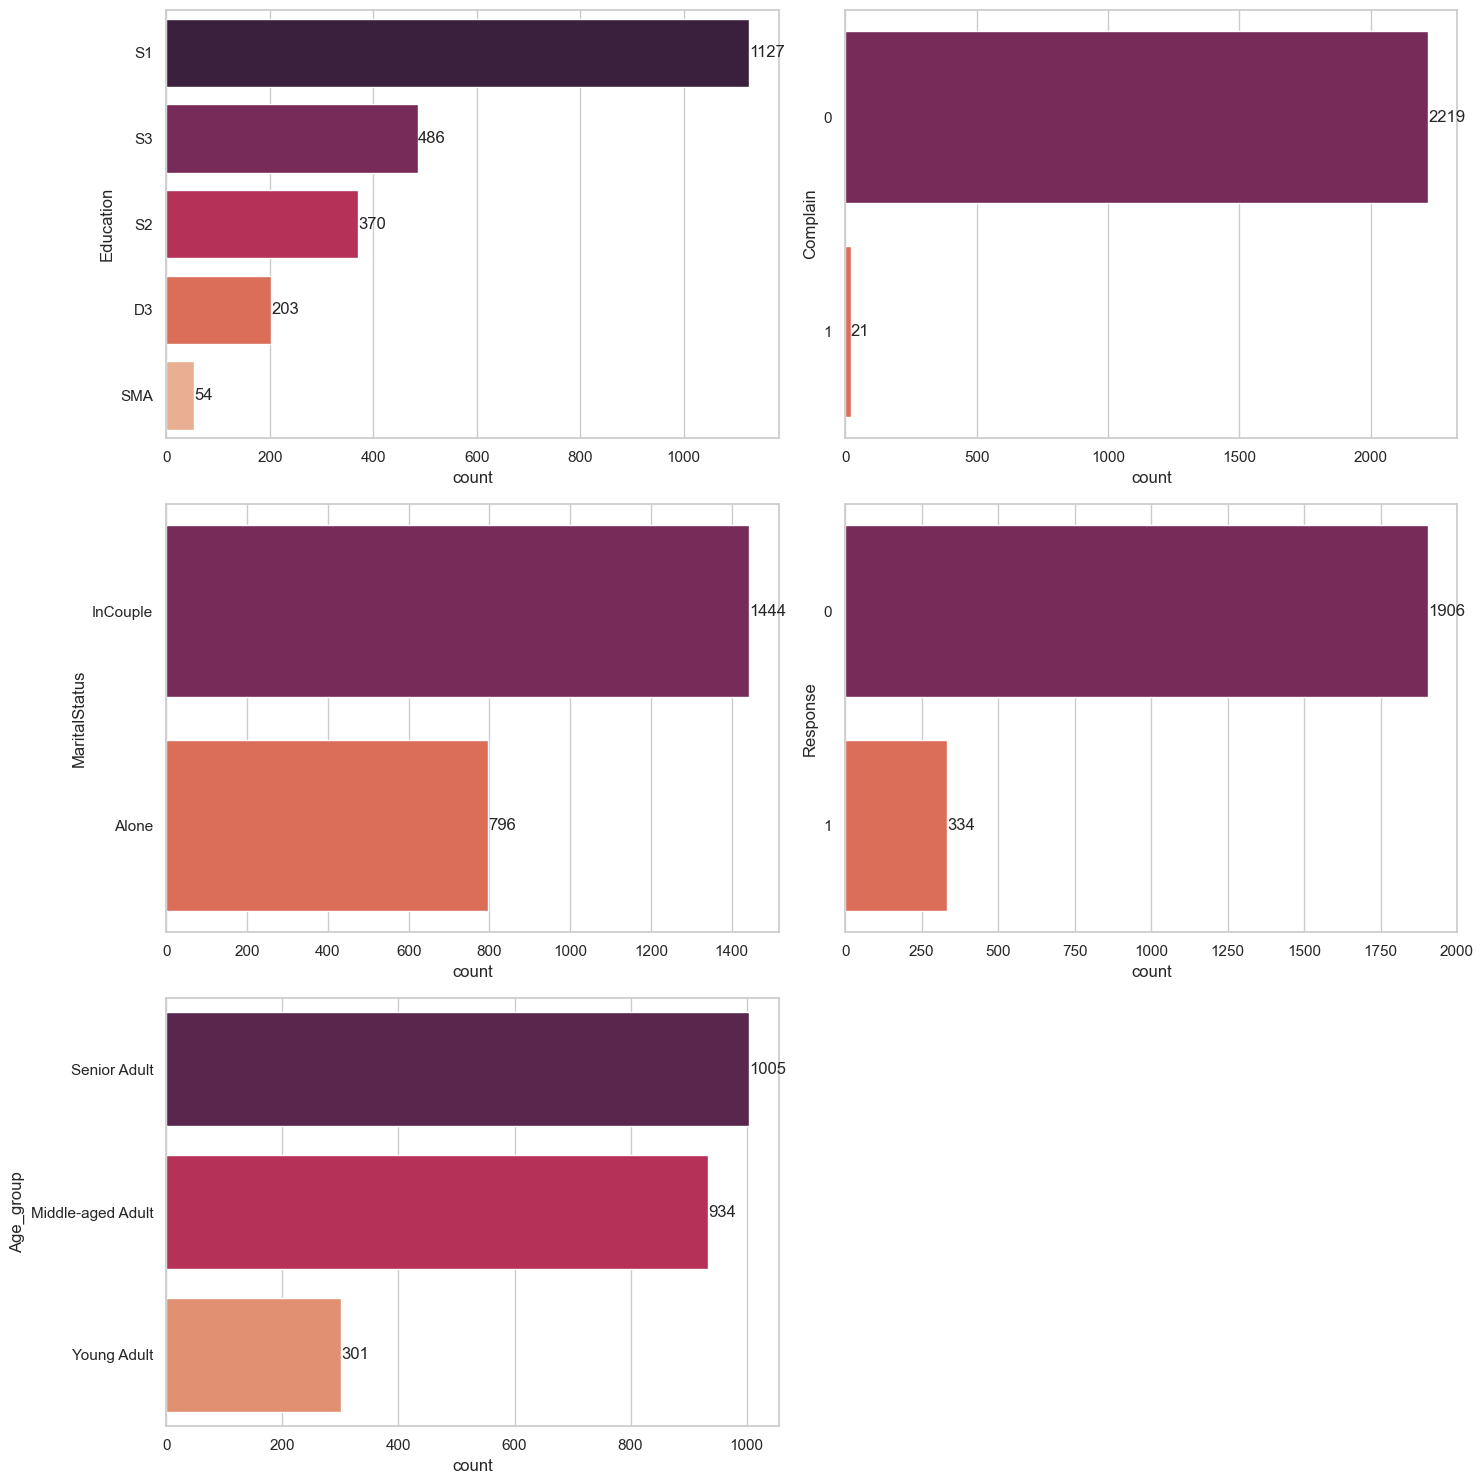

In [30]:
plt.figure(figsize=(15, 15))
for i in range(len(cats)):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(y=cats[i], data=df_eda, palette='rocket', order=df_eda[cats[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

**Observation:**

- In customers `Education`, the majority of customers are S1.
- Customers `Complain` was dominated by 0 means didn't complain.
- In the `MaritalStatus` category, the majority of customers are "InCouple"
- Customers `Response` was dominated by 0 means didn't response.
- In customers `Age_Group`, the dominant categories are "Senior Adult" and followed by "Middle-aged Adult"

## Multivariate Analysis

### Correlation Heatmap Checking

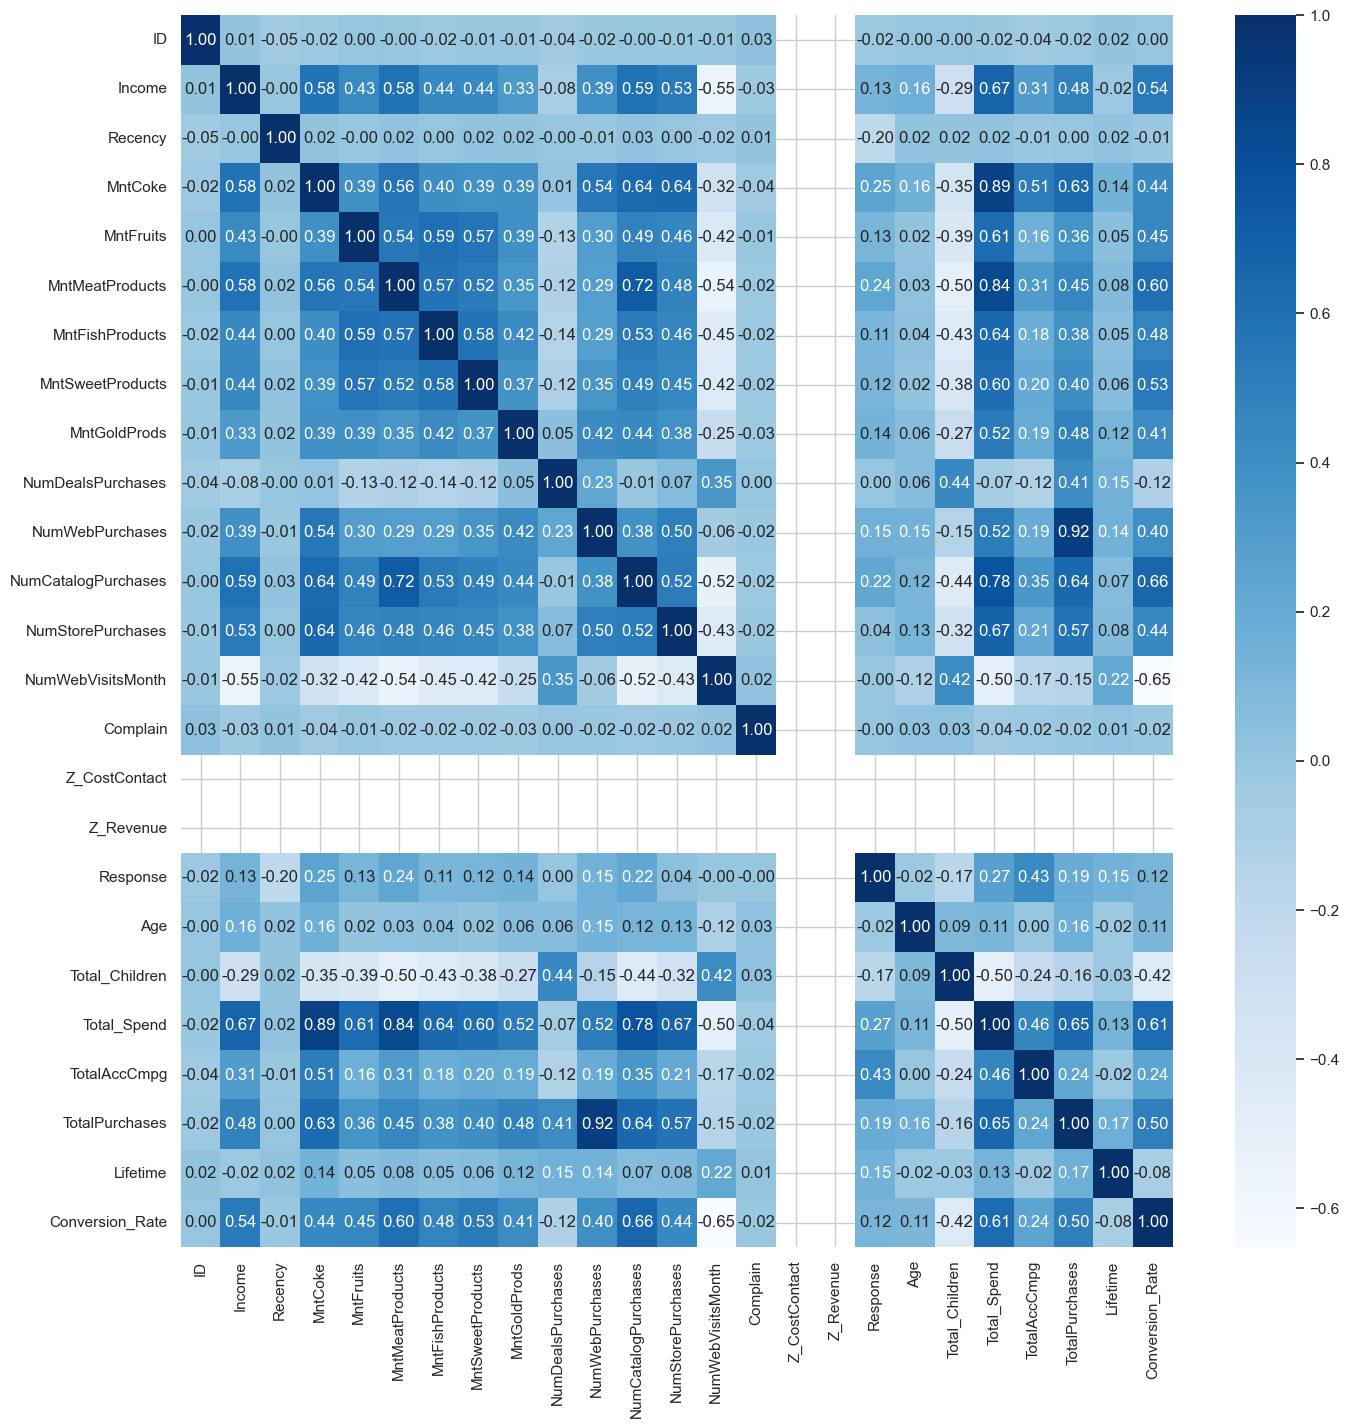

In [31]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_eda.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

**Observations:**

Parameter:
- 0 : There is no correlation between the two variables
- 0 – 0.25 : Very weak correlation
- 0.25 – 0.5 : Correlation is medium
- 0.5 – 0.75 : Strong correlation
- 0.75 – 0.99 : Very strong correlation
- 1 : Correlation perfect positive correlation
- -1 : Correlation of perfect negative correlation

Insight:
- `Response` has medium correlation with `TotalAccCmpg`
- `Age` has no strong correlation with any features.
- `Total_Children` has medium correlation with `NumDealsPurchases` and `NumWebVisitsMonth`.
- `Total_Spend` has very strong correlation with `MntCoke`, `MntMeatProducts`, `NumCatalogPurchases` and strong correlation with `TotalPurchases`, `Conversion_Rate`.
- `TotalAccCmpg` has strong correlation with `MntCoke` and medium correlation with `Total_Spend`.
- `TotalPurchases` has very strong correlation with `NumWebPurchases` and strong correlation with `Conversion_Rate`
- `Lifetime` has no strong correlation with any features.
- `Conversion_Rate` has strong correlation with `Income`, `MntMeatProducts`, `MntSweetProducts`, `NumCatalogPurchases`.

### Total_Spend VS TotalPurchases

Text(0.5, 0.98, 'Total_Spend vs TotalPurchases')

<Figure size 1500x800 with 0 Axes>

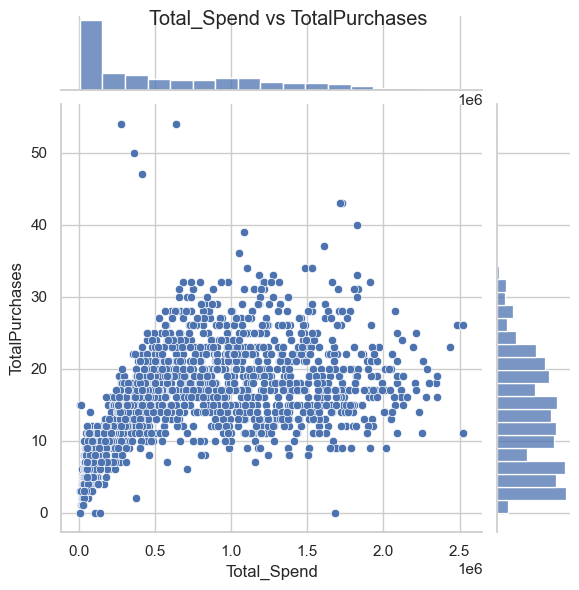

In [32]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df_eda["Total_Spend"], y=df_eda["TotalPurchases"])
plt.suptitle('Total_Spend vs TotalPurchases')
# plot.ax_marg_y.set_ylim(0, 120000000)

**Observations:**

The chart above shows that TotalPurchases & Total_Spend has **positive** correlation

### Total_Spend VS Conversion_Rate

(-1.0, 30.0)

<Figure size 1500x800 with 0 Axes>

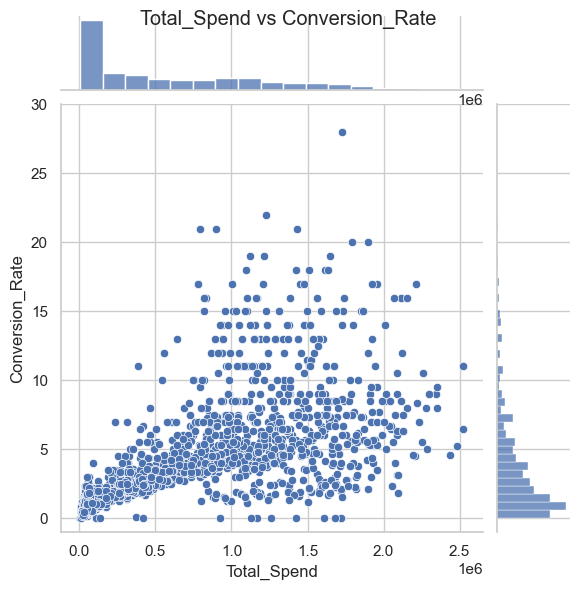

In [33]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df_eda["Total_Spend"], y=df_eda["Conversion_Rate"])
plt.suptitle('Total_Spend vs Conversion_Rate')
plot.ax_marg_y.set_ylim(-1, 30)

**Observations:**

The chart above shows that Total_Spend & Conversion_Rate has **positive** correlation

### TotalPurchases VS Conversion_Rate

(-1.0, 50.0)

<Figure size 1500x800 with 0 Axes>

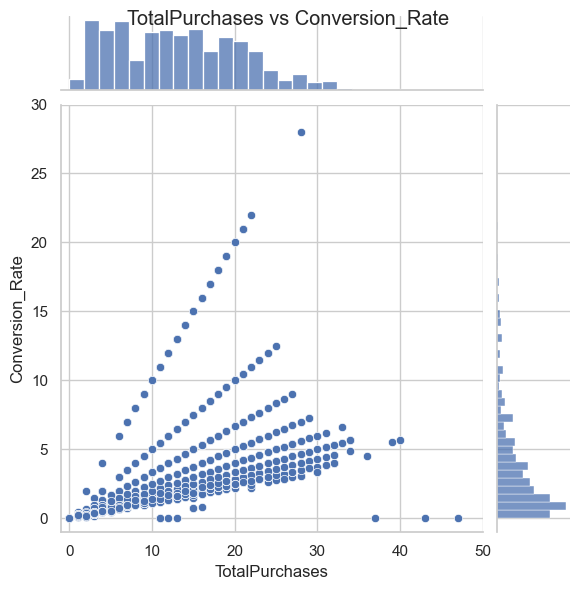

In [34]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df_eda["TotalPurchases"], y=df_eda["Conversion_Rate"])
plt.suptitle('TotalPurchases vs Conversion_Rate')
plot.ax_marg_y.set_ylim(-1, 30)
plot.ax_marg_x.set_xlim(-1, 50)

**Observations:**

The chart above shows that TotalPurchases & Conversion_Rate has **positive** correlation.

### Conversion_Rate VS Income

(-1.0, 25.0)

<Figure size 1500x800 with 0 Axes>

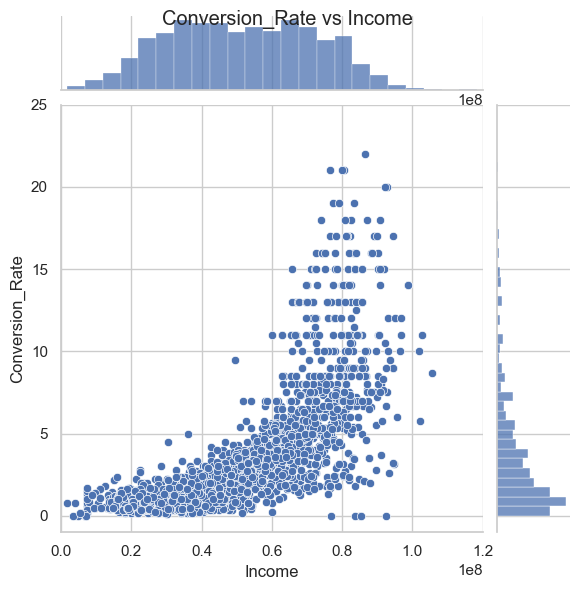

In [35]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df_eda["Income"], y=df_eda["Conversion_Rate"])
plt.suptitle('Conversion_Rate vs Income')
plot.ax_marg_x.set_xlim(-1, 120000000)
plot.ax_marg_y.set_ylim(-1, 25)

**Observations:**

The chart above shows that Conversion_Rate & Income has **positive** correlation

### Total_Spend VS Income

(0.0, 120000000.0)

<Figure size 1500x800 with 0 Axes>

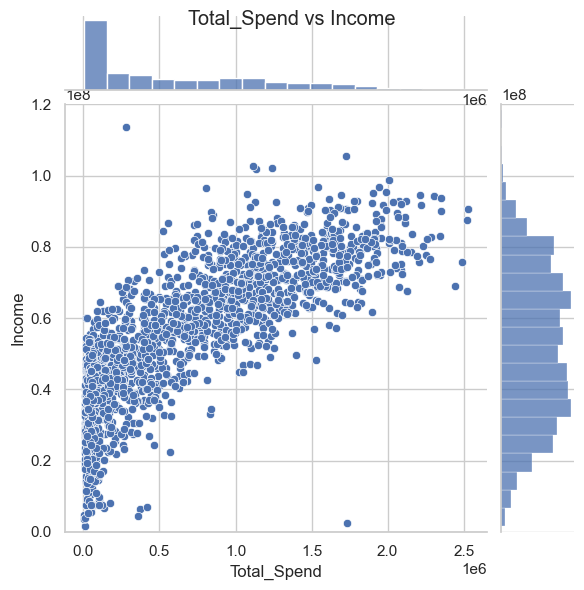

In [36]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df_eda["Total_Spend"], y=df_eda["Income"])
plt.suptitle('Total_Spend vs Income')
plot.ax_marg_y.set_ylim(0, 120000000)

**Observations:**

The chart above shows that Total_Spend & Income has **positive** correlation

### Checking Correlation with Target (Conversion_Rate)

In [37]:
corr = df_eda.corrwith(df_eda["Conversion_Rate"])
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positive" if x >= 0 else "Negative")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr.sort_values('corr value', ascending=False, ignore_index=True)

,index,corr value,Corr Type
0,Conversion_Rate,1.000000,Positive
1,NumCatalogPurchases,0.657120,Positive
2,NumWebVisitsMonth,0.652709,Negative
3,Total_Spend,0.614868,Positive
4,MntMeatProducts,0.597567,Positive
5,Income,0.535058,Positive
6,MntSweetProducts,0.532185,Positive
7,TotalPurchases,0.502688,Positive
8,MntFishProducts,0.476724,Positive
9,MntFruits,0.454512,Positive


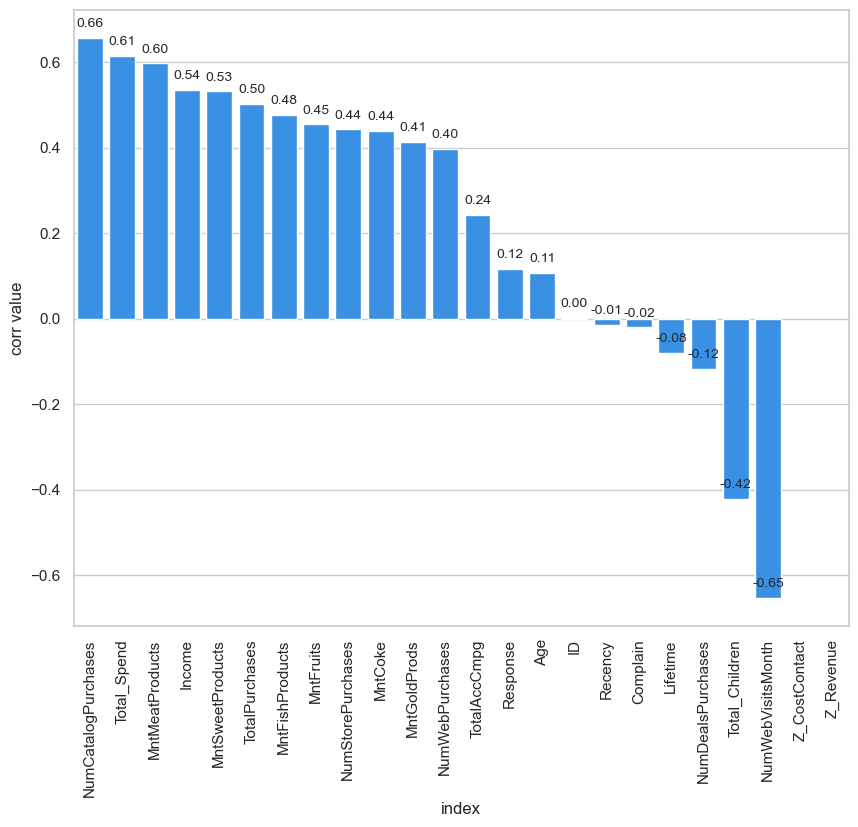

In [38]:
corr = df_eda.corrwith(df_eda["Conversion_Rate"])
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

### Conversion_Rate VS Age

Text(0.5, 0.98, 'Conversion_Rate vs Age')

<Figure size 1500x800 with 0 Axes>

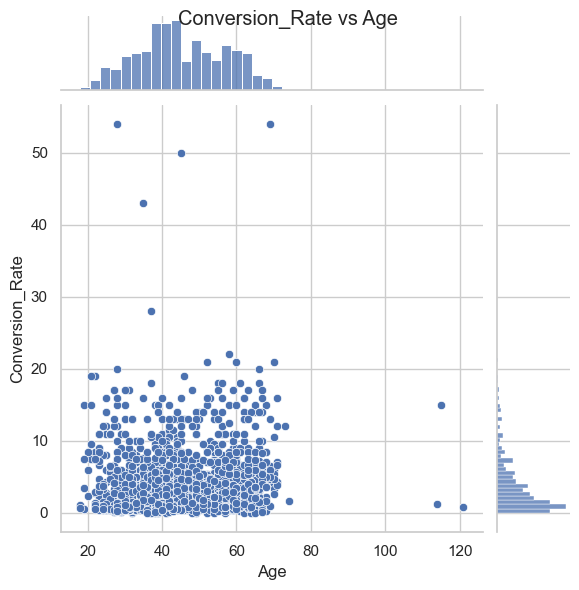

In [39]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df_eda["Age"], y=df_eda["Conversion_Rate"])
plt.suptitle('Conversion_Rate vs Age')
#plot.ax_marg_y.set_ylim(0, 100)

**Observations:**

Since in correlation heatmap plot and correlation with target above, `Conversion_Rate` and `Age` has very insignificant correlation score that is only 11%. From `Conversion Rate VS Age` chart, indicates that the chart above is unable to determine the trend from those features.

## Insight & Recommendations

**Insight**
- The greater customers spend total, the greater amount of customers purchase.
- The greater customers spend total, the greater number of customers conversion rate.
- The greater customers purchase total, the greater number of customers conversion rate.
- The greater customers income, the greater number of customers conversion rate.
- The greater customers income, the greater amount of spend.
- Customers age doesn't have an affection to customers conversion rate.

**Recommendation**

Conversion Rate has a positive correlation against Total_Spend and Income. Hence, we can focus on customers with more than 6,000,000 in income and over 1,000,000 in total spending.

# Task 2 - Data Cleaning and Preprocessing

In [40]:
df2 = df.copy()
df2.sample()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Total_Children,MaritalStatus,Total_Spend,TotalAccCmpg,TotalPurchases,Lifetime,Conversion_Rate
932,932,7922,1951,S3,Lajang,64950000.0,0,1,2012-12-08,29,819000,0,72000,12000,0,63000,2,11,2,10,7,0,1,0,0,0,0,3,11,0,63,Senior Adult,1,Alone,966000,1,26,36,3.714286


## Handling Outliers 

### Manually Trimming

In [41]:
print("The amount of data before handling outliers :", df2.shape[0])

df2 = df2[(df2["Age"] <= 100)]
print("The amount of data after handling outliers (Year_Birth) : {}".format(df2.shape[0]))

df2 = df2[(df2["Income"] >= 666666)]
print("The amount of data after handling outliers (Income) : {}".format(df2.shape[0]))

df2 = df2[(df2["NumDealsPurchases"] <= 6.5)]
print("The amount of data after handling outliers (NumDealsPurchases) : {}".format(df2.shape[0]))

The amount of data before handling outliers : 2240
The amount of data after handling outliers (Year_Birth) : 2237
The amount of data after handling outliers (Income) : 2213
The amount of data after handling outliers (NumDealsPurchases) : 2129


### Z-score

Z-score aren't utilized due not normal distributed data.

In [42]:
# from scipy import stats

# print(f'Total rows before delete outlier: {len(df2)}')

# filtered_entries = np.array([True] * len(df2))
# nums2= ['Income', 'Age']

# for col in nums2:
#     zscore = abs(stats.zscore(df2[col])) # calculate absolute z-score 
#     filtered_entries = (zscore < 3) & filtered_entries # keep that less than 3 absolute z-score
    
# df2 = df2[filtered_entries] # filter, taking under than 3 z-score

# print(f'Total rows after delete outlier: {len(df2)}')

### IQR Trimming

IQR Trimming aren't utilized due too many datas will be removed

In [43]:
# def handling_outliers_iqr(data, cols):
#     q1 = data[cols].quantile(q=0.25)
#     q3 = data[cols].quantile(q=0.75)
#     iqr = q3-q1
#     fence_low = q1 - 1.5+iqr
#     fence_high = q3 + 1.5+iqr
    
#     lower_outlier = data[data[cols] < fence_low]
#     upper_outlier = data[data[cols] > fence_low]
    
#     filter_outliers = (data[cols] >= fence_low) & (data[cols] <= fence_high)
#     filtered = data[filter_outliers]
#     return filtered

# cols = ['Age','Income']
# print('Amount of data before haling outliers :', df2.shape[0])

# for i in cols:
#     df2 = handling_outliers_iqr(df2, i)
#     print('Amount of data before haling outliers ({})'.format(i, df2.shape[0]))

## Data Cleaning

### Handling Missing Values

In [44]:
# Checking missing values percentage

print('Missing values status:', df2.isnull().values.any())
nvc = pd.DataFrame(df2.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df2.shape[0])*100
nvc["Data Type"] = [df2[col].dtype for col in df2.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: False
                     Total Null Values  Percentage       Data Type
Unnamed: 0                           0         0.0           int64
AcceptedCmp3                         0         0.0           int64
AcceptedCmp4                         0         0.0           int64
AcceptedCmp5                         0         0.0          object
AcceptedCmp1                         0         0.0          object
AcceptedCmp2                         0         0.0         float64
Complain                             0         0.0           int64
Z_CostContact                        0         0.0           int64
NumWebVisitsMonth                    0         0.0  datetime64[ns]
Z_Revenue                            0         0.0           int64
Age                                  0         0.0           int64
Age_group                            0         0.0           int64
Total_Children                       0         0.0           int64
MaritalStatus                    

**Observations:**

- `income` column has 2216 rows which means it missing 24 rows or 1.074% of data at first. But that missing value was disappeared after "Handling Outlier" .

We know that `Income` column has **right-skewed** distribution, hence imputation by median is executed.

In [44]:
# df2['Income'] = df2['Income'].fillna(df2['Income'].median())

In [45]:
# print('Missing value left:', df2.isna().sum().sum())

### Handling Duplicated Values

In [46]:
df2[df2.duplicated(keep=False)].sort_values(by=list(df2.columns.values))

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Total_Children,MaritalStatus,Total_Spend,TotalAccCmpg,TotalPurchases,Lifetime,Conversion_Rate


In [47]:
df2.duplicated().sum()

0

In [48]:
df2.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_group', 'Total_Children', 'MaritalStatus', 'Total_Spend',
       'TotalAccCmpg', 'TotalPurchases', 'Lifetime', 'Conversion_Rate'],
      dtype='object')

There is no duplicated row containing in this dataset.

### Drop Unnecessary Features

In [49]:
# Dropping Features
df2_clean = df2.drop(columns=[
    'Unnamed: 0', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Marital_Status'
    ])

'''
df2_clean = df2.drop(columns=[
    'Unnamed: 0', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Marital_Status',
    'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Z_CostContact', 'Z_Revenue'
    ])
'''
# Checking Data
df2_clean.columns

Index(['Education', 'Income', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_group', 'Total_Children', 'MaritalStatus', 'Total_Spend',
       'TotalAccCmpg', 'TotalPurchases', 'Lifetime', 'Conversion_Rate'],
      dtype='object')

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2129 non-null   int64         
 1   ID                   2129 non-null   int64         
 2   Year_Birth           2129 non-null   int64         
 3   Education            2129 non-null   object        
 4   Marital_Status       2129 non-null   object        
 5   Income               2129 non-null   float64       
 6   Kidhome              2129 non-null   int64         
 7   Teenhome             2129 non-null   int64         
 8   Dt_Customer          2129 non-null   datetime64[ns]
 9   Recency              2129 non-null   int64         
 10  MntCoke              2129 non-null   int64         
 11  MntFruits            2129 non-null   int64         
 12  MntMeatProducts      2129 non-null   int64         
 13  MntFishProducts      2129 non-nul

## Data Preprocessing

In [51]:
# Creatung BackUp Variable

df2_ppc = df2_clean.copy()

### Feature Encoding

In [52]:
cats_encode = ['Education', 'MaritalStatus', 'Age_group'] 

for col in cats_encode:
  print(f'value counts of column {col}')
  print(df2_ppc[col].value_counts())
  print('==='*15, '\n')

value counts of column Education
S1     1072
S3      462
S2      349
D3      192
SMA      54
Name: Education, dtype: int64

value counts of column MaritalStatus
InCouple    1369
Alone        760
Name: MaritalStatus, dtype: int64

value counts of column Age_group
Senior Adult         949
Middle-aged Adult    883
Young Adult          297
Name: Age_group, dtype: int64



#### Label Encoding

In [53]:
# Education Mapping
map_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df2_ppc['Education'] = df2_ppc['Education'].map(map_education)

In [54]:
# AgeGroup Mapping
map_age = {
    'Young Adult' : 0,
    'Middle-aged Adult' : 1,
    'Senior Adult' : 2
}

df2_ppc['Age_group'] = df2_ppc['Age_group'].map(map_age)

In [55]:
# Marital Status Mapping

map_marital = {
    'Alone' : 0,
    'InCouple' : 1
}

df2_ppc['MaritalStatus'] = df2_ppc['MaritalStatus'].map(map_marital)
df2_ppc = df2_ppc.rename(columns={'MaritalStatus':'Has_Couple'})

#### One Hot Encoding

In [56]:
# # MaritalStatus One Hot Encoding
# cats_ohe = ['MaritalStatus'] 

# for cats in cats_ohe:
#     onehots = pd.get_dummies(df2_ppc[cats], prefix=cats)
#     df2_ppc = df2_ppc.join(onehots)

In [57]:
# #Dropping MaritalStatus Feature 
# df2_ppc = df2_ppc.drop(columns=['MaritalStatus']).copy()

In [58]:
# Checking Value from each feature

encoded = ['Education', 'Has_Couple', 'Age_group']

for col in encoded:
    print("{} have {} unique values: {}".format(col, df2_ppc[col].nunique(), df2_ppc[col].dtypes))
    if df2_ppc[col].dtypes == 'int64' or df2_ppc[col].dtypes == 'float64' or df2_ppc[col].dtypes == 'object':
        print("{} values: {}".format(col,df2_ppc[col].unique()))
        print('-' * 100)

Education have 5 unique values: int64
Education values: [2 4 3 0 1]
----------------------------------------------------------------------------------------------------
Has_Couple have 2 unique values: int64
Has_Couple values: [0 1]
----------------------------------------------------------------------------------------------------
Age_group have 3 unique values: int64
Age_group values: [2 0 1]
----------------------------------------------------------------------------------------------------


In [59]:
# Checking Data
df2_ppc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2129 non-null   int64  
 1   Income               2129 non-null   float64
 2   Recency              2129 non-null   int64  
 3   MntCoke              2129 non-null   int64  
 4   MntFruits            2129 non-null   int64  
 5   MntMeatProducts      2129 non-null   int64  
 6   MntFishProducts      2129 non-null   int64  
 7   MntSweetProducts     2129 non-null   int64  
 8   MntGoldProds         2129 non-null   int64  
 9   NumDealsPurchases    2129 non-null   int64  
 10  NumWebPurchases      2129 non-null   int64  
 11  NumCatalogPurchases  2129 non-null   int64  
 12  NumStorePurchases    2129 non-null   int64  
 13  NumWebVisitsMonth    2129 non-null   int64  
 14  AcceptedCmp3         2129 non-null   int64  
 15  AcceptedCmp4         2129 non-null   i

In [60]:
df2_ppc.sample(3)

,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Total_Children,Has_Couple,Total_Spend,TotalAccCmpg,TotalPurchases,Lifetime,Conversion_Rate
98,1,78497000.0,44,207000,26000,447000,75000,0,223000,1,5,7,12,2,0,0,0,1,0,0,3,11,0,63,2,0,1,978000,1,18,13,9.000000
871,2,62450000.0,61,515000,47000,267000,62000,66000,38000,2,5,5,4,3,0,1,0,0,0,0,3,11,0,55,2,1,0,995000,1,17,6,5.666667
1775,2,42586000.0,7,194000,2000,56000,0,0,0,5,4,1,6,8,0,0,0,0,0,0,3,11,1,59,2,2,1,252000,0,14,34,1.750000


### Feature Scaling

In [61]:
df2_scal = df2_ppc.copy()

#### Feature Standardization

In [62]:
# for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2_scal)
df2_scal = pd.DataFrame(scaler.transform(df2_scal), columns= df2_scal.columns )
df2_scal.describe()

,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Total_Children,Has_Couple,Total_Spend,TotalAccCmpg,TotalPurchases,Lifetime,Conversion_Rate
count,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2129.0,2129.0,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03
mean,1.668724e-16,4.338683e-17,-2.753395e-17,8.009876e-17,1.501852e-17,6.007407e-17,5.423353e-17,9.177983e-18,6.007407e-17,-1.134732e-16,2.669959e-17,1.501852e-17,1.334979e-17,-1.001234e-16,-1.168107e-17,5.882253e-17,-1.251543e-17,3.754629e-17,1.501852e-17,-1.460134e-17,0.0,0.0,1.334979e-17,-2.778426e-16,-1.259887e-16,-4.672428e-17,-1.284918e-16,1.334979e-17,4.171810e-18,-8.009876e-17,-1.718786e-16,-6.591460e-17
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,0.0,0.0,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.439148e+00,-1.923374e+00,-1.688384e+00,-8.892974e-01,-6.670443e-01,-7.530732e-01,-6.908224e-01,-6.597733e-01,-8.380019e-01,-1.514071e+00,-1.480452e+00,-9.331593e-01,-1.770946e+00,-2.211870e+00,-2.860226e-01,-2.792395e-01,-2.850606e-01,-2.642901e-01,-1.175139e-01,-9.489331e-02,0.0,0.0,-4.167126e-01,-2.297568e+00,-1.863286e+00,-1.251715e+00,-1.342131e+00,-9.832689e-01,-4.405033e-01,-1.715278e+00,-1.693952e+00,-9.250655e-01
25%,-4.536973e-01,-6.880433e-01,-8.613568e-01,-8.214320e-01,-6.419863e-01,-6.850425e-01,-6.362905e-01,-6.355972e-01,-6.632114e-01,-7.821325e-01,-7.423062e-01,-9.331593e-01,-8.501519e-01,-9.481421e-01,-2.860226e-01,-2.792395e-01,-2.850606e-01,-2.642901e-01,-1.175139e-01,-9.489331e-02,0.0,0.0,-4.167126e-01,-7.668146e-01,-4.368437e-01,-1.251715e+00,-1.342131e+00,-8.812387e-01,-4.405033e-01,-9.066959e-01,-6.011866e-01,-6.721230e-01
50%,-4.536973e-01,-4.443445e-02,1.294860e-04,-3.965357e-01,-4.665803e-01,-4.628089e-01,-4.726949e-01,-4.663643e-01,-3.718939e-01,-5.019399e-02,-3.732334e-01,-2.253944e-01,-2.362895e-01,3.155857e-01,-2.860226e-01,-2.792395e-01,-2.850606e-01,-2.642901e-01,-1.175139e-01,-9.489331e-02,0.0,0.0,-4.167126e-01,-8.647984e-02,-4.368437e-01,1.177101e-01,7.450837e-01,-3.875443e-01,-4.405033e-01,-9.811356e-02,-5.132764e-03,-3.348663e-01
75%,5.390279e-01,6.702823e-01,8.616157e-01,6.007902e-01,1.598698e-01,3.263471e-01,2.180421e-01,1.863913e-01,2.107411e-01,6.817445e-01,7.339852e-01,4.823706e-01,6.845042e-01,7.368283e-01,-2.860226e-01,-2.792395e-01,-2.850606e-01,-2.642901e-01,-1.175139e-01,-9.489331e-02,0.0,0.0,-4.167126e-01,8.489804e-01,9.895984e-01,1.177101e-01,7.450837e-01,7.331420e-01,-4.405033e-01,7.104688e-01,5.909211e-01,3.396472e-01
max,1.531753e+00,2.430363e+01,1.723102e+00,3.516051e+00,4.269383e+00,7.070456e+00,4.017096e+00,5.674373e+00,5.396193e+00,2.877560e+00,8.484515e+00,8.975550e+00,2.219160e+00,6.212982e+00,3.496227e+00,3.581156e+00,3.508027e+00,3.783721e+00,8.509629e+00,1.053815e+01,0.0,0.0,2.399735e+00,2.464775e+00,9.895984e-01,2.856560e+00,7.450837e-01,3.163764e+00,5.393597e+00,5.561963e+00,1.783029e+00,1.273383e+01


# Task 3 - Data Modelling

For segmenting customers, we used LRFM (Loyalty, Recency, Frequency, Monetary) Analysis as the base of segmenting.
Several columns will be chosen according to LRFM.

Loyalty (L) - TotalAccCmpg

Recency (R) - Recency

Frequency (F) - TotalPurchases

Monetary (M) - Total_Spend

In [63]:
# Copy Dataset
df_dr = df2_scal.copy()

# Filtering columns for LRFM Analysis
df_dr = df_dr[['TotalAccCmpg', 'Recency', 'TotalPurchases', 'Total_Spend']]
# df_rd.columns = ['L', 'R', 'F', 'M']
df_dr.describe(include='all')

,TotalAccCmpg,Recency,TotalPurchases,Total_Spend
count,2.129000e+03,2.129000e+03,2.129000e+03,2.129000e+03
mean,4.171810e-18,-2.753395e-17,-8.009876e-17,1.334979e-17
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-4.405033e-01,-1.688384e+00,-1.715278e+00,-9.832689e-01
25%,-4.405033e-01,-8.613568e-01,-9.066959e-01,-8.812387e-01
50%,-4.405033e-01,1.294860e-04,-9.811356e-02,-3.875443e-01
75%,-4.405033e-01,8.616157e-01,7.104688e-01,7.331420e-01
max,5.393597e+00,1.723102e+00,5.561963e+00,3.163764e+00


## Elbow Method

The ***Elbow Method*** is used in purpose to find the proper amount of clusters.

In [64]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(df_dr)
    inertia.append(km.inertia_)

In [65]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    35.949648
1    23.176797
2    21.782225
3    18.002626
4     8.869346
5     8.163618
6     7.137277
7     7.095766
8     5.553627
9          NaN
dtype: float64

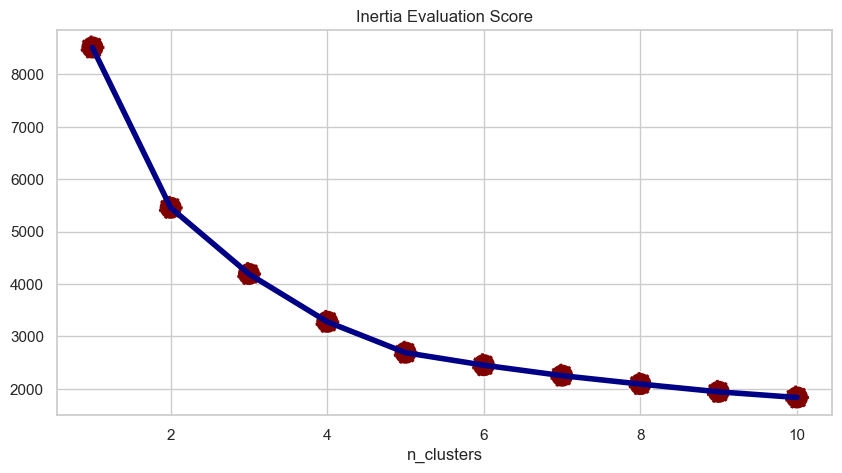

In [66]:
plt.figure(figsize=(10, 5))
plt.title('Inertia Evaluation Score')
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

## Silhouette Score using Elbow Method

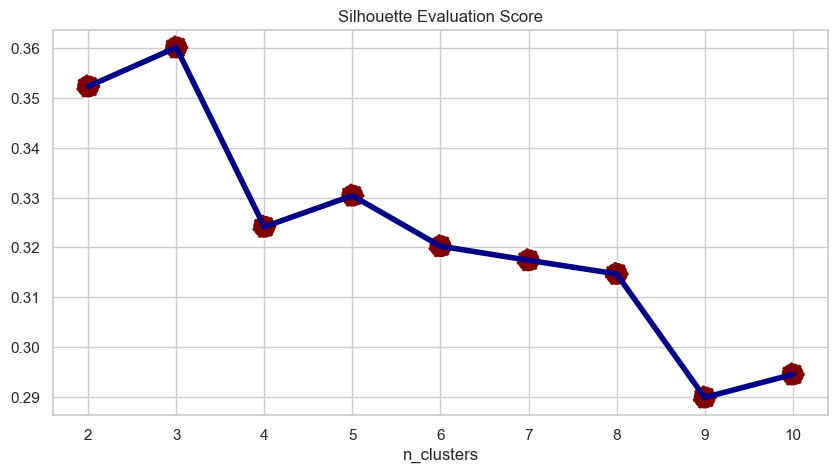

In [67]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_dr)
    preds = kmeans.predict(df_dr)
    score_euclidean = silhouette_score(df_dr, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Silhouette Evaluation Score')
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

> From the analysis by considering both evaluation scores in the charts, we decided to divide the customers into 4 clusters (n_clusters = 4)

## Clustering With K-Means

In [68]:
kMeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=0) 
y_pred_kMeans = kMeans.fit_predict(df_dr)
df_dr["Cluster"] = y_pred_kMeans

#Adding the Clusters feature to the orignal dataframe.
df2_ppc["Cluster"] = y_pred_kMeans
df2_clean["Cluster"] = y_pred_kMeans

In [69]:
df2_ppc.sample(5)

,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Total_Children,Has_Couple,Total_Spend,TotalAccCmpg,TotalPurchases,Lifetime,Conversion_Rate,Cluster
31,3,38620000.0,56,112000,17000,44000,34000,22000,89000,1,2,5,3,3,0,0,0,0,0,0,3,11,0,51,2,0,1,318000,0,10,23,3.333333,1
1698,4,41437000.0,5,29000,0,2000,0,0,1000,1,1,0,3,7,0,0,0,0,0,0,3,11,0,57,2,2,0,32000,0,3,33,0.428571,3
1289,2,52531000.0,68,283000,112000,151000,51000,72000,125000,2,7,2,10,6,0,0,0,0,0,0,3,11,0,43,1,0,1,794000,0,18,36,3.000000,2
1514,1,20981000.0,14,2000,12000,10000,6000,13000,30000,1,3,1,2,8,0,0,0,0,0,0,3,11,1,37,1,0,1,73000,0,8,16,1.000000,3
2201,2,57731000.0,0,266000,21000,300000,65000,8000,44000,4,8,8,6,6,0,0,0,0,0,0,3,11,0,45,1,1,0,704000,0,28,35,4.666667,2


## PCA

In [70]:
from sklearn.decomposition import PCA 

In [71]:
#PCA for visualization 
pca = PCA(n_components=2)

pca.fit(df_dr)
pcs = pca.transform(df_dr)
df_pca = pd.DataFrame(data = pcs, columns=(["PC 1","PC 2"]))
df_pca['Cluster'] = df_dr["Cluster"]
df_pca.sample(5)

,PC 1,PC 2,Cluster
391,2.425163,-0.198434,0
914,0.588411,-1.292465,1
1648,0.045241,0.715784,2
1671,0.547461,-0.287570,2
432,3.083471,0.416288,0


## Visualization of Customer Clusters with PCA

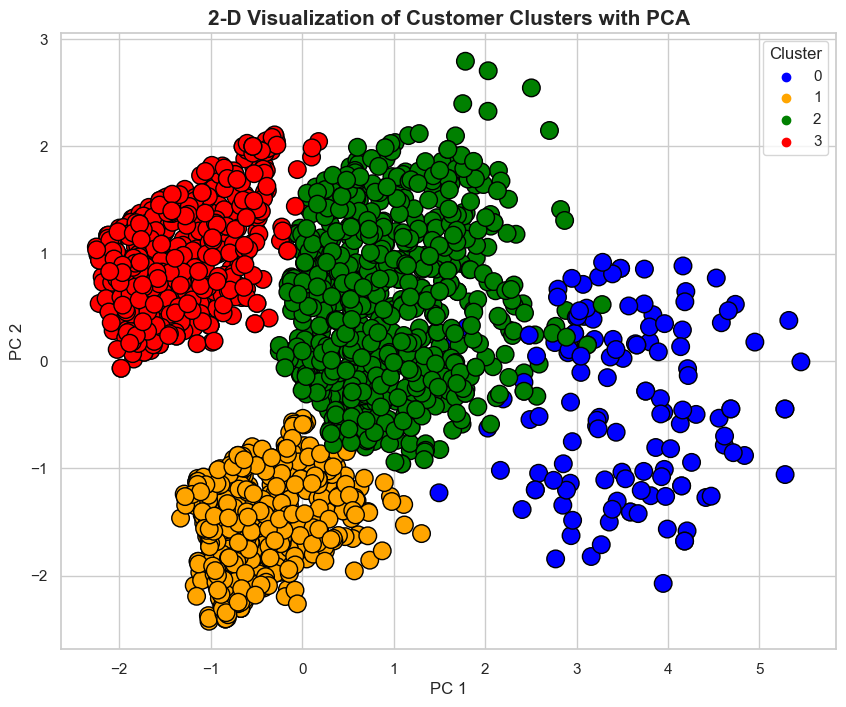

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters with PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Cluster",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

## Silhouette Score Plot with PCA

For n_clusters = 4 The average silhouette_score is : 0.4520047216372472


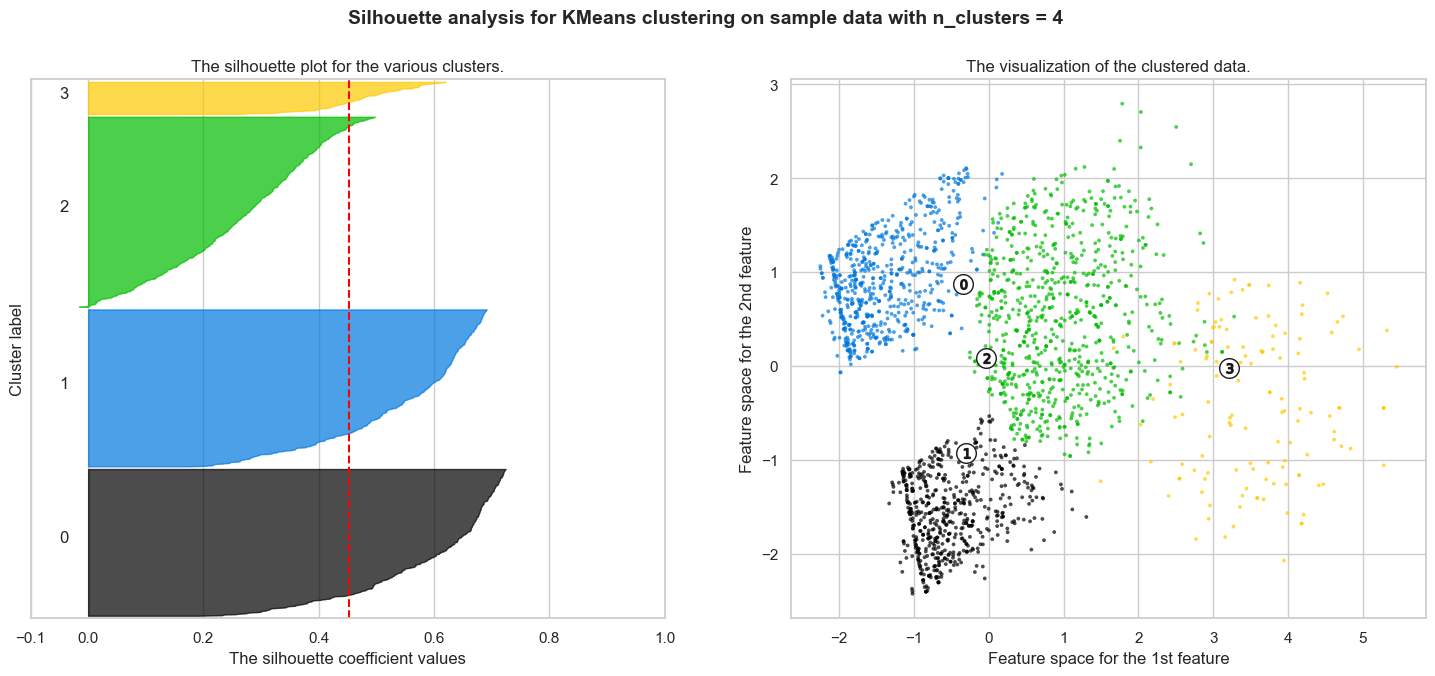

In [73]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_dr

range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_pca.iloc[:, 0], df_pca.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Task 4 - Interpretations & Summary

## Feature Statistic by Each Cluster

In [74]:
df3_clus = df_pca['Cluster'].value_counts().reset_index()
df3_clus.columns = ['Cluster','Customers']
df3_clus['Percentage (%)'] = round((df3_clus['Customers']/(sum(df3_clus['Customers'])))*100,2)
df3_clus

,Cluster,Customers,Percentage (%)
0,2,769,36.12
1,3,635,29.83
2,1,594,27.90
3,0,131,6.15


Text(0.5, 1.0, 'Amount of Customers by Each Cluster')

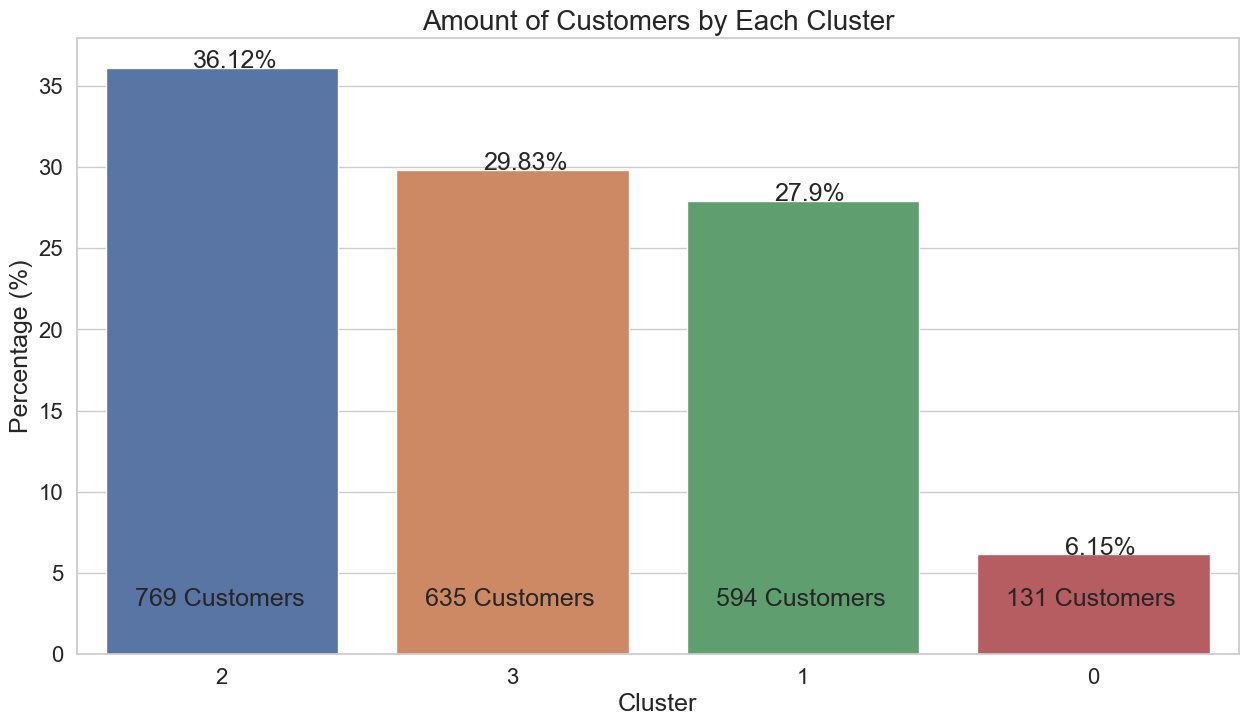

In [75]:
fig, ax = plt.subplots(figsize=(15,8))

br = sns.barplot(x = 'Cluster',y='Percentage (%)',
                 data=df3_clus,ax=ax,
                 order=df3_clus.sort_values('Percentage (%)',ascending = False).Cluster)

x = np.arange(len(df3_clus['Cluster']))
y = df3_clus['Percentage (%)']
z = df3_clus['Customers']

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i], s = str(y[i])+'%', size = 18) # add data points

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.3 , y = 3, s = str(z[i])+' Customers', size = 18) # add data points

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Cluster', fontsize = 18)
plt.ylabel('Percentage (%)', fontsize = 18)
plt.title('Amount of Customers by Each Cluster', fontsize = 20)

Quantity and percentage of customers by each segmentations are no evenly distributed

## Mean & Median LRFM by Each Cluster

In [76]:
display(df2_ppc.groupby('Cluster').agg(['mean','median']))

Education               Income                Recency         \
             mean median          mean      median       mean median   
Cluster                                                                
0        2.610687    2.0  7.977326e+07  81574000.0  48.374046   46.0   
1        2.336700    2.0  3.798954e+07  37086000.0  74.415825   76.0   
2        2.551365    2.0  6.758374e+07  68462000.0  51.616385   54.0   
3        2.423622    2.0  4.095844e+07  38175000.0  22.173228   22.0   

               MntCoke               MntFruits          MntMeatProducts  \
                  mean    median          mean   median            mean   
Cluster                                                                   
0        891832.061069  957000.0  50511.450382  28000.0   405786.259542   
1         64814.814815   27000.0   8513.468013   3000.0    35212.121212   
2        556256.176853  518000.0  49509.752926  33000.0   324517.555267   
3         92228.346457   35000.0  10908.661417   3000.0    47055.118110   

                  MntFishProducts          MntSweetProducts           \
           median            mean   median             mean   median   
Cluster                                                                
0        396000.0    72900.763359  52000.0     58847.328244  42000.0   
1         18000.0    10962.962963   4000.0      7813.131313   3000.0   
2        253000.0    72460.338101  52000.0     51737.321196  36000.0   
3         18000.0    14374.803150   4000.0      9393.700787   3000.0   

         MntGoldProds          NumDealsPurchases        NumWebPurchases  \
                 mean   median              mean median            mean   
Cluster                                                                   
0        75335.877863  46000.0          1.282443    1.0        5.572519   
1        19409.090909  11000.0          2.033670    2.0        2.346801   
2        73607.282185  54000.0          2.219766    2.0        6.200260   
3        21829.921260  12000.0          2.080315    2.0        2.595276   

               NumCatalogPurchases        NumStorePurchases         \
        median                mean median              mean median   
Cluster                                                              
0          5.0            6.030534    6.0          8.076336    8.0   
1          2.0            0.782828    1.0          3.744108    3.0   
2          6.0            4.855657    4.0          8.306892    8.0   
3          2.0            0.984252    1.0          4.116535    3.0   

        NumWebVisitsMonth        AcceptedCmp3        AcceptedCmp4         \
                     mean median         mean median         mean median   
Cluster                                                                    
0                3.648855    3.0     0.244275    0.0     0.595420    1.0   
1                6.094276    6.0     0.050505    0.0     0.018519    0.0   
2                4.261378    4.0     0.068921    0.0     0.074122    0.0   
3                5.990551    6.0     0.072441    0.0     0.012598    0.0   

        AcceptedCmp5        AcceptedCmp1        AcceptedCmp2         Complain  \
                mean median         mean median         mean median      mean   
Cluster                                                                         
0           0.786260    1.0     0.679389    1.0     0.198473    0.0  0.007634   
1           0.001684    0.0     0.000000    0.0     0.000000    0.0  0.011785   
2           0.072822    0.0     0.063719    0.0     0.000000    0.0  0.006502   
3           0.000000    0.0     0.001575    0.0     0.004724    0.0  0.009449   

               Z_CostContact        Z_Revenue         Response         \
        median          mean median      mean median      mean median   
Cluster                                                                 
0          0.0           3.0    3.0      11.0   11.0  0.656489    1.0   
1          0.0           3.0    3.0      11.0   11.0  0.037037

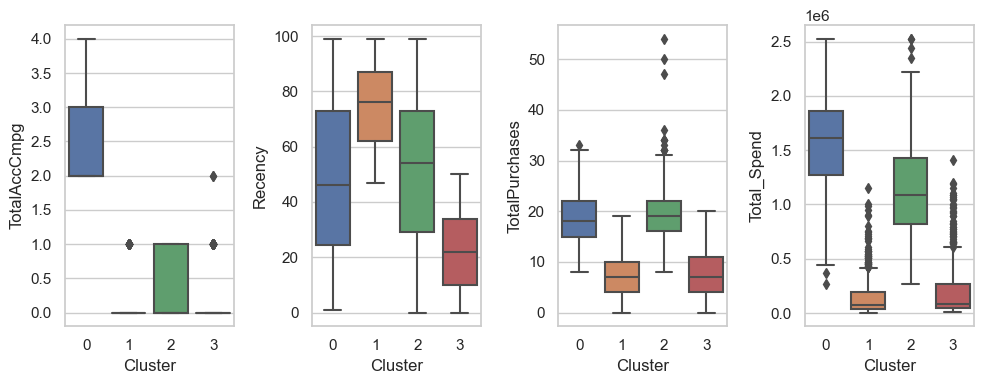

In [77]:
fig, axes = plt.subplots(1, 4, figsize=(10,4))
cols = [i for i in df_dr.columns if i != "Clusters"]
for index, ax in enumerate(axes):
    sns.boxplot(x = df2_ppc['Cluster'], y = df2_ppc[cols[index]], ax=ax)
    plt.tight_layout()

plt.show()

By the charts above, customer characteristics were decided desiring the amount of customer spends and how often transactions are made. Hence segmentations will be made.

- **Cluster 0** =  Best Value Customer, a customer that spent plenty and did do transactions quite frequently
- **Cluster 1** =  Low Value Customer, a customer that spent little and didn't do transactions frequently
- **Cluster 2** =  High Potential Value Customer, a customer that spent quite plenty and did do transactions quite frequently
- **Cluster 3** =  Low Spend Frequent Customer, a customer that spent little and did do transactions frequently

## Visualization of Customer Clusters Based on its Characteristics

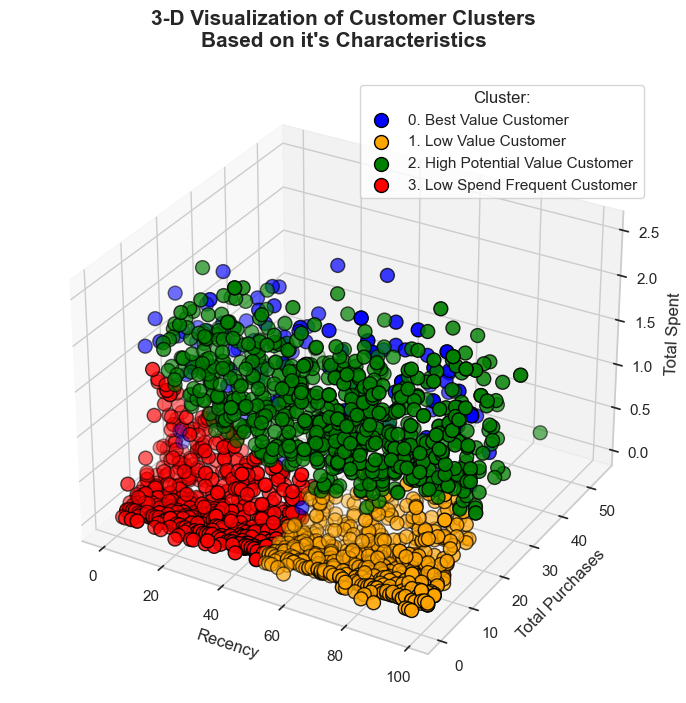

In [78]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics\n                                                                                                                    ", 
          fontsize=15, weight='bold')
ax.scatter(df2_ppc['Recency'][df2_ppc.Cluster == 0], df2_ppc['TotalPurchases'][df2_ppc.Cluster == 0], df2_ppc['Total_Spend'][df2_ppc.Cluster == 0], c='blue', s=100, edgecolor='black', label='0. Best Value Customer')
ax.scatter(df2_ppc['Recency'][df2_ppc.Cluster == 1], df2_ppc['TotalPurchases'][df2_ppc.Cluster == 1], df2_ppc['Total_Spend'][df2_ppc.Cluster == 1], c='orange', s=100, edgecolor='black', label='1. Low Value Customer')
ax.scatter(df2_ppc['Recency'][df2_ppc.Cluster == 2], df2_ppc['TotalPurchases'][df2_ppc.Cluster == 2], df2_ppc['Total_Spend'][df2_ppc.Cluster == 2], c='green', s=100, edgecolor='black', label='2. High Potential Value Customer')
ax.scatter(df2_ppc['Recency'][df2_ppc.Cluster == 3], df2_ppc['TotalPurchases'][df2_ppc.Cluster == 3], df2_ppc['Total_Spend'][df2_ppc.Cluster == 3], c='red', s=100, edgecolor='black', label='3. Low Spend Frequent Customer')
plt.xlabel('Recency')
plt.ylabel('Total Purchases')
ax.set_zlabel('Total Spent')
plt.legend(title='Cluster:', loc='upper right')
plt.show()

In [79]:
df2_ppc.sample()

,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Total_Children,Has_Couple,Total_Spend,TotalAccCmpg,TotalPurchases,Lifetime,Conversion_Rate,Cluster
845,2,81205000.0,43,724000,74000,929000,97000,55000,130000,1,5,6,7,2,1,0,1,0,1,0,3,11,1,44,1,0,1,2009000,3,17,1,8.5,0


## Customers Total by Each Cluster Based on Age

In [80]:
df3_age_clust = df2_clean.groupby(['Cluster', 'Age_group']).agg({'Income':'count'}).reset_index()
df3_age_clust = df3_age_clust.rename(columns={'Income':'total_customers'})
df3_age_clust['sum_customers'] = df3_age_clust['total_customers'].sum()
df3_age_clust['pct'] = round((df3_age_clust['total_customers']/df3_age_clust['sum_customers'])*100, 2)
df3_age_clust

,Cluster,Age_group,total_customers,sum_customers,pct
0,0,Middle-aged Adult,55,2129,2.58
1,0,Senior Adult,49,2129,2.30
2,0,Young Adult,27,2129,1.27
3,1,Middle-aged Adult,260,2129,12.21
4,1,Senior Adult,243,2129,11.41
5,1,Young Adult,91,2129,4.27
6,2,Middle-aged Adult,262,2129,12.31
7,2,Senior Adult,428,2129,20.10
8,2,Young Adult,79,2129,3.71
9,3,Middle-aged Adult,306,2129,14.37


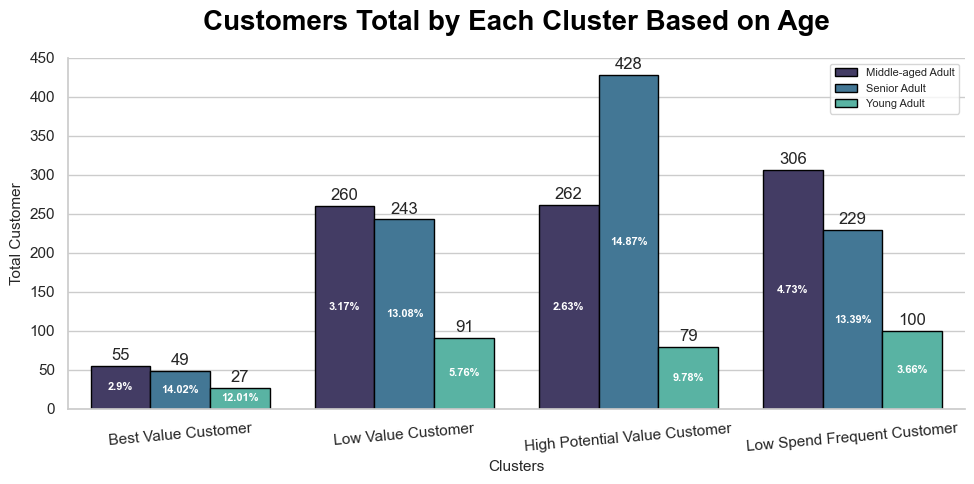

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Customers Total by Each Cluster Based on Age", fontsize=20, color='black', weight='bold', pad=20)
sns.barplot(x='Cluster', y='total_customers', data=df3_age_clust, hue='Age_group', edgecolor='black', palette='mako')
# plt.text(x=-0.8, y=370, s="Middle Aged Customer dominated on each cluster (>13% of total customer).", fontsize=12, fontstyle='italic')
plt.xlabel('Clusters', fontsize=11)
plt.xticks(np.arange(4), ['Best Value Customer', 'Low Value Customer', 'High Potential Value Customer', 'Low Spend Frequent Customer'], rotation=5)
plt.ylabel('Total Customer', fontsize=11)
plt.ylim(0, 450)
plt.legend(prop={'size':8}, loc='best')
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
plt.bar_label(ax.containers[2], padding=2)
plt.bar_label(ax.containers[0], ['2.9%', '3.17%', '2.63%', '4.73%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['14.02%', '13.08%', '14.87%', '13.39%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[2], ['12.01%', '5.76%', '9.78%', '3.66%'], label_type='center', color='white', weight='bold', fontsize=8)
sns.despine()
plt.tight_layout()


**Observations:** 

- `Best Value Customer` cluster has almost the same number of **Middle-Aged Adult** and **Senior Adult**.
- Like `Best Value Customer` cluster, `Low Value Customer` has almost the same number of **Middle-Aged Adult** and **Senior Adult** but the amount of customers is higher.
- The majority of `High Potential Value Customer` are **Senior Adults**.
- The majority of `Low Spend Frequent Customer` is **Middle-aged Adult**.

## Income VS Conversion Rate by Each Cluster

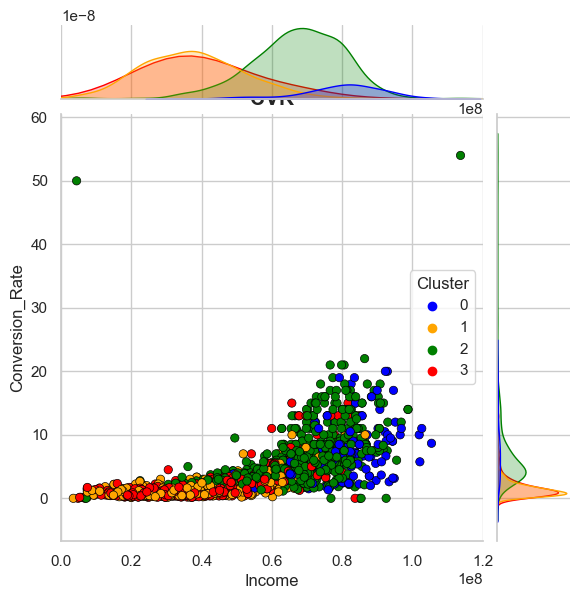

In [82]:
plot = sns.jointplot(x=df2_clean['Income'], y=df2_clean['Conversion_Rate'], hue=df2_clean['Cluster'], edgecolor='black', palette=['blue','orange','green','red'])
plt.title('Income\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 120000000)
plt.show()

## Total Spend VS Conversion Rate by Each Cluster

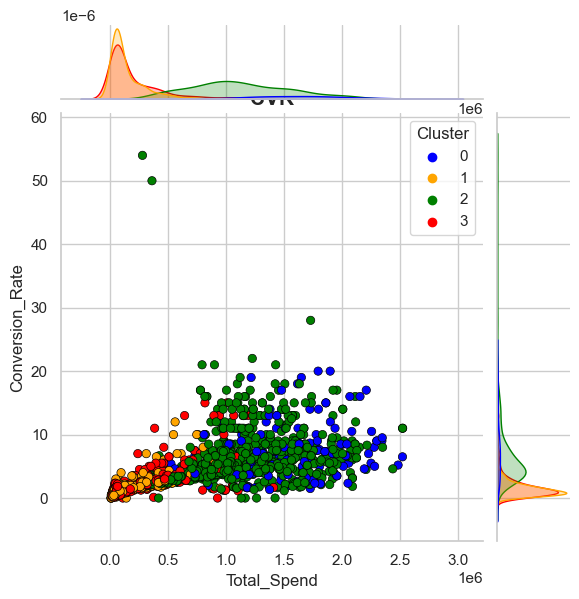

In [83]:
plot = sns.jointplot(x=df2_clean['Total_Spend'], y=df2_clean['Conversion_Rate'], hue=df2_clean['Cluster'], edgecolor='black', palette=['blue','orange','green','red'])
plt.title('Income\nvs.\nCVR', fontsize=15, weight='bold')
# plot.ax_marg_x.set_xlim(0, 30)
plt.show()

## Customer Clusters Summary

By taking into consideration of plots that we observed above, we can take a conclusion about the characteristics of each cluster below:

    
- **Cluster 0 (Best Value Customer)**

    - Has 131 customers.
    - Dominant with Middle-aged Adults and Senior Adults.
    - Has the highest (around IDR 81 million) income per year.
    - Has the highest (around IDR 1,61 million) total yearly spend.
    - Has the lowest (far lower than other clusters) number of deals/promo purchases.
    - Has the highest conversion rate.
    - Is the champions cluster.
---------------------------------------------------------------------------------------------------------------------    
- **Cluster 1 (Low Value Customer)**

    - Has 594 customers.
    - Dominant with Middle-aged Adults and Senior Adults.
    - Has the lowest (around IDR 37 million) income per year.
    - Has the lowest (around IDR 0,07 million) total spend per year.
    - Has the third highest number of deals/promo purchases.
    - Has the lowest conversion rate.
    - Is in need of attention.
---------------------------------------------------------------------------------------------------------------------
- **Cluster 2 (High Potential Value Customer)**

    - Has 769 customers.
    - Dominant with Senior Adults.
    - Has second highest (around IDR 68 million) income per year.
    - Has second highest (around IDR 1,08 million) total yearly spend.
    - Has the highest number of deals/promo purchases.
    - Has the second-highest conversion rate.
    - Is the potential loyalist.
---------------------------------------------------------------------------------------------------------------------    
- **Cluster 3  (Low Spend Frequent Customer)**

    - Has 635 customers.
    - Dominant with Middle-aged Adults.
    - Has second lowest (around IDR 38 million) income per year.
    - Has second lowest (around IDR 0,09 million) total spend per year.
    - Has the second highest number of deals/promo purchases.
    - Has second lowest conversion rate.
    - Is at risk of churn.

## Recommendations

1. Create a membership tier program to increase client retention. Membership tier items will also entice users to spend more on our platform. Assume we have four membership tiers (Platinum, Gold, Silver, and Bronze), and each membership category provides various customer benefits. The higher their membership tier, the more benefits they will receive. We can assign membership tiers based on customer clusters in this scenario (Platinum: High-Valued Customer, Gold: High-Valued Frequent Customer, Silver: Low-Valued Frequent Customer, Bronze: Low-Valued Customer).
--------------------
2. Since we have High Value Customers (Best Value Customer & High Potential Value Customer), try to prioritize focusing on their segment to avoid churn. Continue to track their purchasing trends and retain them by improving our service, after-sales care, and the quality of our products and apps. Furthermore, we can provide them with the highest membership tier (Platinum Tier), in which case we can provide them with more discounts, promotions, and free shipping costs than any other membership tier in order to encourage them to buy on our platform more frequently.
--------------------
3. To avoid Low Spend Frequent Customers to do churn, provide more promotions or free shipping cost coupons to our High-Valued Frequent Customer group via our membership tier program to encourage them to shop on our platform more frequently.
--------------------
4. Because Low-Valued Frequent Customer and Low-Valued Customer have the lowest overall spend on our platform, we should produce more personalized ads, specials, and campaigns for low-cost products to entice these groups to buy on our platform. This method may boost their recency (to low) and total number of purchases (to high) on varying products.

### Calculating Potential Impact

By calculating every `Total_Spend` from all clusters (assumpting won't do churn), we can estimate potential upcoming yearly **GMV**.

In [84]:
print('Total Spent of Best Value Customer: '+str(df2_clean[df2_clean['Cluster']==0].Total_Spend.sum()))
print('Total Spent of Low Value Customer: '+str(df2_clean[df2_clean['Cluster']==1].Total_Spend.sum()))
print('Total Spent of High Potential Value Customer: '+str(df2_clean[df2_clean['Cluster']==2].Total_Spend.sum()))
print('Total Spent of Low Spend Frequent Customer: '+str(df2_clean[df2_clean['Cluster']==3].Total_Spend.sum()))
print('Total Spent from All Clusters: '+str(203733000+87155000+867500000+124327000))

Total Spent of Best Value Customer: 203733000
Total Spent of Low Value Customer: 87155000
Total Spent of High Potential Value Customer: 867500000
Total Spent of Low Spend Frequent Customer: 124327000
Total Spent from All Clusters: 1282715000
